In [123]:
import pandas as pd

In [124]:
path='/content/Reviewsnew1.csv'

In [125]:
df=pd.read_csv(path)

In [126]:
#data

In [127]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,the food is worst,0
2,Crust is not good.,0
3,Not tasty and the texture was just nasty.,0
4,Stopped by during the late May bank holiday of...,1
5,The selection on the menu was great and so wer...,1
6,Now I am getting angry and I want my damn pho.,0
7,Honeslty it didn't taste THAT fresh.),0
8,The potatoes were like rubber and you could te...,0
9,The fries were great too.,1


In [128]:
df.shape

(1000, 2)

In [129]:
#Data cleaning
#Remove splecial characters

In [130]:
df['Review'] = df['Review'].str.lower()
df['Review'] = df['Review'].str.replace('[^\w\s]', '')
df['Review'] = df['Review'].str.replace('\d', '')

<ipython-input-130-124ce5b7a66d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review'] = df['Review'].str.replace('[^\w\s]', '')
<ipython-input-130-124ce5b7a66d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review'] = df['Review'].str.replace('\d', '')


In [131]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [132]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
drops = pd.Series(' '.join(df['Review']).split()).value_counts()[-250:]
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [133]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [134]:
from textblob import Word
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [135]:
#After removing stopwords and performing lemmatization

In [136]:
df['Review']

0                                        wow loved place
1                                             food worst
2                                             crust good
3                                    tasty texture nasty
4      stopped late may bank holiday rick steve recom...
                             ...                        
995                               cant tell disappointed
996                    think food flavor texture lacking
997                              appetite instantly gone
998                      overall impressed would go back
999    whole experience underwhelming think well go s...
Name: Review, Length: 1000, dtype: object

In [137]:
l=[]
for i in range(0,1000):
    s=df['Review'][i]
    l.append(s)
print(l)

['wow loved place', 'food worst', 'crust good', 'tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great price', 'getting angry want damn pho', 'honeslty didnt taste fresh', 'potato like rubber could tell made ahead time kept warmer', 'fry great', 'great touch', 'service prompt', 'would go back', 'cashier care ever say still ended wayyy overpriced', 'tried cape cod ravoli chicken cranberrymmmm', 'disgusted pretty sure human hair', 'shocked sign indicate cash', 'highly recommended', 'waitress little slow service', 'place worth time let alone vega', 'like', 'burrittos blah', 'food amazing', 'service also cute', 'could care le interior beautiful', 'performed', 'thats rightthe red velvet cakeohhh stuff good', 'name', 'hole wall great mexican street taco friendly staff', 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed', 'worst salmon sashimi', 'also combo like burger fry beer decent deal',

In [138]:
#Finding Term Frequency

In [139]:
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [140]:
tf.columns = ["words", "tf"]
tf.head(10)

,words,tf
0,wow,3.0
1,loved,10.0
2,place,111.0
3,food,125.0
4,worst,15.0
5,crust,2.0
6,good,94.0
7,tasty,11.0
8,texture,3.0
9,nasty,3.0


In [141]:
tf.sort_values("tf", ascending = False)

,words,tf
3,food,125.0
2,place,111.0
6,good,94.0
43,service,84.0
20,great,70.0
...,...,...
946,gristle,1.0
947,fat,1.0
948,steiner,1.0
949,dollar,1.0


In [142]:
#Unique words in given data

In [143]:
tf["words"].nunique()

1581

In [144]:
#to plot graph based on words

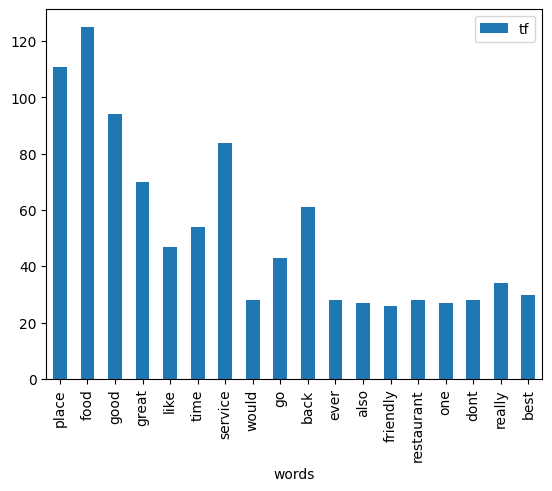

In [145]:
import matplotlib.pyplot as plt
tf[tf["tf"] > 25].plot.bar(x="words", y="tf")
plt.show()

In [146]:
#Word Cloud for resultant data after data cleaning

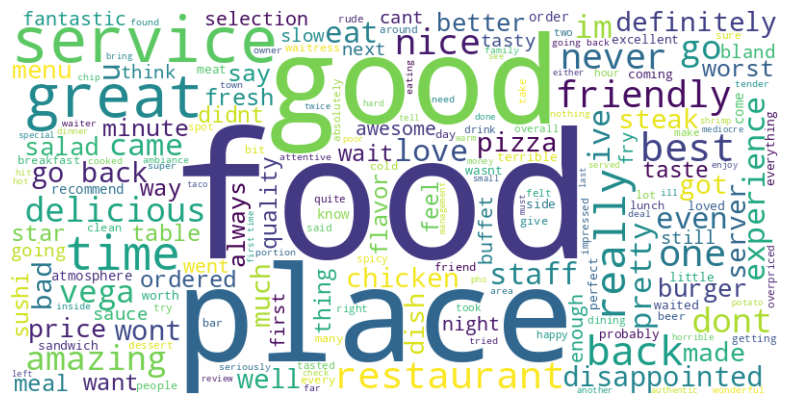

In [147]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(word_list):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(word_list))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Example usage
generate_wordcloud(l)

In [148]:
import nltk
nltk.download('vader_lexicon')
#vader lexicon contain list of words and corresponding sentiment scores,which indicates how positive,negative,neutral


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [149]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("The food was amazing")

{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859}

In [150]:
##compound score indicates postive and negative,if compound score >0 it is positive else it is negative

In [151]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.115, 'pos': 0.885, 'comp...
1    {'neg': 0.804, 'neu': 0.196, 'pos': 0.0, 'comp...
2    {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...
3    {'neg': 0.643, 'neu': 0.357, 'pos': 0.0, 'comp...
4    {'neg': 0.131, 'neu': 0.414, 'pos': 0.455, 'co...
5    {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...
6    {'neg': 0.645, 'neu': 0.215, 'pos': 0.14, 'com...
7    {'neg': 0.395, 'neu': 0.605, 'pos': 0.0, 'comp...
8    {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...
9    {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...
Name: Review, dtype: object

In [152]:
df["polarity_score"] = df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [153]:
df.head(10)

,Review,Liked,polarity_score
0,wow loved place,1,0.8271
1,food worst,0,-0.6249
2,crust good,0,0.4404
3,tasty texture nasty,0,-0.5574
4,stopped late may bank holiday rick steve recom...,1,0.6908
5,selection menu great price,1,0.6249
6,getting angry want damn pho,0,-0.6908
7,honeslty didnt taste fresh,0,-0.2411
8,potato like rubber could tell made ahead time ...,0,0.5719
9,fry great,1,0.6249


In [154]:
df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    pos
1    neg
2    pos
3    neg
4    pos
5    pos
6    neg
7    neg
8    pos
9    pos
Name: Review, dtype: object

In [155]:
df["sentiment_label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] >= 0 else "neg")
df.head(10)

,Review,Liked,polarity_score,sentiment_label
0,wow loved place,1,0.8271,pos
1,food worst,0,-0.6249,neg
2,crust good,0,0.4404,pos
3,tasty texture nasty,0,-0.5574,neg
4,stopped late may bank holiday rick steve recom...,1,0.6908,pos
5,selection menu great price,1,0.6249,pos
6,getting angry want damn pho,0,-0.6908,neg
7,honeslty didnt taste fresh,0,-0.2411,neg
8,potato like rubber could tell made ahead time ...,0,0.5719,pos
9,fry great,1,0.6249,pos


In [156]:
df.groupby("sentiment_label")["Liked"].mean()

sentiment_label
neg    0.108491
pos    0.605330
Name: Liked, dtype: float64

In [157]:
#Creating Bag of Words

In [158]:
# Creating Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
import joblib
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(l).toarray()
y = df.iloc[:, 1].values

# Creating a pickle file for the CountVectorizer model
#joblib.dump(cv, "cv.pkl")


In [159]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [160]:
y[1:100]

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [161]:
#Training the model

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [163]:
from sklearn.naive_bayes import MultinomialNB
# Fitting Naive Bayes to the Training set
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)


MultinomialNB(alpha=0.2)

In [164]:
# Creating a pickle file for the Multinomial Naive Bayes model
#joblib.dump(classifier, "model.pkl")


In [165]:
#prediction
y_pred=classifier.predict(X_test)

In [166]:
#Confusion Matrix

<Axes: >

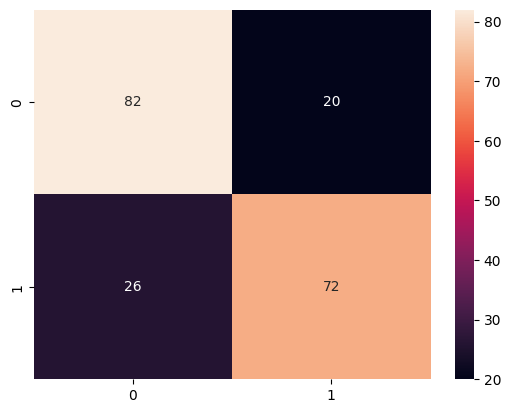

In [167]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

In [168]:
#Resultant Accuracy

In [169]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)

0.77

In [170]:
#Give test data

In [171]:
import numpy as np
x_pred=np.array(['the food is worst'])
x_pred=cv.transform(x_pred).toarray()
if(classifier.predict(x_pred)==1):
  print("Positive Review")
else:
  print("Negative Review")



Negative Review
